### Neural Network Project - Image Classification on CIFAR-10

## Building and Optimising a Neural Network for Image Classification

This project focuses on developing a convolutional neural network (CNN) to classify images from the CIFAR-10 dataset. The workflow includes data preprocessing, model design, optimisation, and performance analysis.

---

### Key Steps

1. **Preprocess the Dataset**
    - Normalize pixel values to the [0, 1] range.
    - Perform data augmentation (e.g., random flips, rotations) to improve generalisation.
    - Split the dataset into training, validation, and test sets.

2. **Define the Neural Network**
    - Use convolutional layers for feature extraction.
    - Add pooling layers to reduce spatial dimensions.
    - Incorporate fully connected (dense) layers for classification.
    - Apply activation functions (e.g., ReLU, Tanh) after each layer.
    - Use dropout layers to prevent overfitting.

3. **Optimise the Network**
    - Experiment with different optimisers: SGD, Adam, RMSprop.
    - Adjust learning rates and use learning rate schedulers.
    - Implement regularisation techniques (dropout, L2 regularisation).
    - Tune batch size and number of epochs.

---

### Analysing Model Performance and Experimenting with Hyperparameters

#### Performance Analysis
- Plot training and validation accuracy and loss curves to monitor learning progress.
- Evaluate final model performance on the test set to measure generalisation.
- Use confusion matrices and classification reports for detailed analysis.

#### Experimentation
- Try different activation functions (e.g., ReLU, Tanh) to observe their impact.
- Test various optimisers and compare convergence speed and final accuracy.
- Adjust learning rate, batch size, and regularisation parameters to optimise results.
- Experiment with network depth and width (number of layers and filters).

---

By systematically following these steps and analysing results, i can iteratively improve a neural network's performance on the CIFAR-10 image classification task.

In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Load CIFAR-10 Dataset

In [20]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalise pixel values to [0.1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# one hot encoding target labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (50000, 32, 32, 3), (50000, 10)
Testing data shape: (10000, 32, 32, 3), (10000, 10)


Define baseline model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# display the model summary
model.summary()

# train the baseline model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size = 64,
    verbose=1
)

# evalyate the baseline model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3036 - loss: 1.8883 - val_accuracy: 0.5179 - val_loss: 1.3484
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5069 - loss: 1.3939 - val_accuracy: 0.5874 - val_loss: 1.1799
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5640 - loss: 1.2294 - val_accuracy: 0.6334 - val_loss: 1.0442
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6036 - loss: 1.1223 - val_accuracy: 0.6516 - val_loss: 1.0021
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6248 - loss: 1.0598 - val_accuracy: 0.6739 - val_loss: 0.9435
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6500 - loss: 0.9944 - val_accuracy: 0.6713 - val_loss: 0.9378
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6686 - loss: 0.9479 - val_accuracy: 0.6790 - val_loss: 0.9184
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6759 - loss: 0.9195 - val_accuracy: 0.

Define an improved model

In [22]:
improved_model = Sequential([
    Conv2D(64, (5,5), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(128, (5,5), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# compile the improved model with a learning rate scheduler
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
improved_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# train the improved model
improved_history = improved_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size = 64,
    verbose=1
)

# evaluate the improved model
improved_loss, improved_accuracy = improved_model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {improved_loss}, Test accuracy: {improved_accuracy}")


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.3094 - loss: 1.8600 - val_accuracy: 0.5291 - val_loss: 1.3315
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.5169 - loss: 1.3532 - val_accuracy: 0.5665 - val_loss: 1.2397
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.5786 - loss: 1.1900 - val_accuracy: 0.6159 - val_loss: 1.0845
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.6217 - loss: 1.0801 - val_accuracy: 0.6415 - val_loss: 1.0212
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.6481 - loss: 1.0006 - val_accuracy: 0.6664 - val_loss: 0.9563
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.6752 - loss: 0.9149 - val_accuracy: 0.6787 - val_loss: 0.9385
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.6930 - loss: 0.8651 - val_accuracy: 0.6818 - val_loss: 0.9164
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.7163 - loss: 0.8027 - 

plot training and validation accuracy

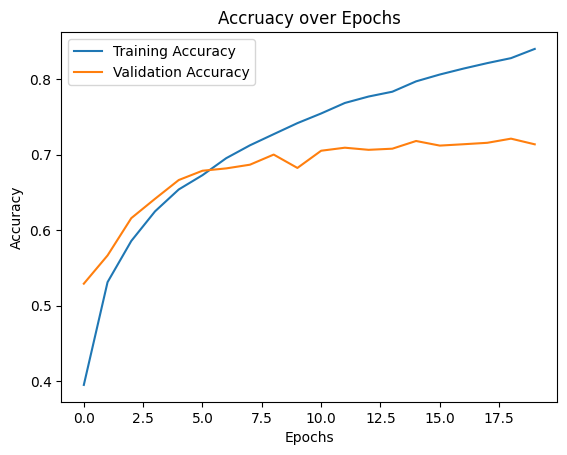

In [ ]:
plt.plot(improved_history.history["accuracy"], label="Training Accuracy")
plt.plot(improved_history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accruacy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plot training and validation loss

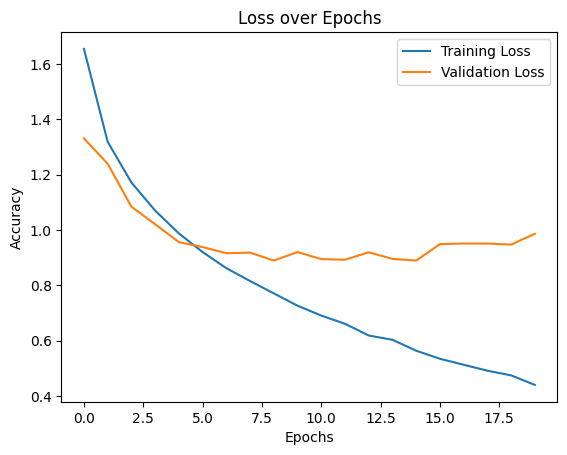

In [24]:
plt.plot(improved_history.history['loss'], label="Training Loss")
plt.plot(improved_history.history['val_loss'], label="Validation Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()